In [1]:
import pdfplumber

In [36]:
with pdfplumber.open('Santander - FII.pdf') as pdf:
    page = pdf.pages[0]
    all_text = ''
    text = page.extract_text()
    for row in text:
        all_text += text
    row = all_text.split('\n')

In [37]:
    nota = row[3].split()
    obj_nota = {
        "Numero da Pagina": row[0],
        "Data Pregão": nota[0],
        "N_Nota": nota[1]
    }
    #print(obj_nota)

In [38]:
    linha5 = row[5].split()
    num_endereco = 0
    endereco = ''
    while num_endereco <= len(linha5) - 3:
        endereco += f"{linha5[num_endereco]} "
        num_endereco += 1
       
    telefone = row[6].split()
    
    obj_corretora = {
        "Nome da Corretora": row[4],
        "Endereco": endereco,
        "CEP": linha5[-1],
        "Telefone_Capitais_e_regições_metropolitanas": f"{telefone[0]} {telefone[1][0]}{telefone[1][1]}{telefone[1][2]}{telefone[1][3]}",
        "Telefone_Demais_Localidades": f"{telefone[5]} {telefone[6]} {telefone[7][0]}{telefone[7][1]}{telefone[7][2]}{telefone[7][3]}",
        "Telefone_Pessoas_com_deficiencia": f"{telefone[-3]} {telefone[-2]} {telefone[-1][0]}{telefone[-1][1]}{telefone[-1][2]}{telefone[-1][3]}",
        "Site": row[8],
        "CNPJ": row[9]
    }
    print(obj_corretora)

{'Nome da Corretora': 'SANTANDER CORRETORA DE CÂMBIO E VALORES MOBILIÁRIOS S.A', 'Endereco': 'AV. JUSCELINO KUBITSCHEK, 2041 / 2235 -24° ANDAR -SÃO PAULO -SP ', 'CEP': '04543-011', 'Telefone_Capitais_e_regições_metropolitanas': '4004 3535', 'Telefone_Demais_Localidades': '0800 702 3535', 'Telefone_Pessoas_com_deficiencia': '0800 723 5007', 'Site': 'WWW.SANTANDERCORRETORA.COM.BR', 'CNPJ': '51.014.223/0001-49'}


{'Número do Cliente': '614218-1', 'Nome': 'SERGIO CARLOS PANIGASSI', 'Endereço': 'R TOME DE SOUSA, 100 -AP 121 -CENTRO (011) 4368-6579 09710-240 -SAO BERNARDO DO CAMPO-SP', 'CPF_CNPJ_CVM_COB': '054.238.648-87', 'Codigo Cliente': '614218-1', 'Assessor': '15'}


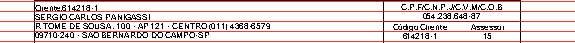

In [44]:
    coluna_cliente = page.crop((20, 200, page.width, 243))
    cliente_settings = {
        "vertical_strategy": "lines",
        "horizontal_strategy": "explicit",
        "explicit_horizontal_lines": [201, 211, 221, 231, 241]
    }
    table_cliente = coluna_cliente.extract_table(cliente_settings)
    num_cliente = table_cliente[0][1].split('Cliente:')
    info_cliente = table_cliente[3][2].split()
    
    
    obj_cliente = {
        "Número do Cliente": num_cliente[-1],
        "Nome": table_cliente[1][1],
        "Endereço": f"{table_cliente[2][1]} {table_cliente[3][1]}",
        "CPF_CNPJ_CVM_COB": table_cliente[1][2],
        "Codigo Cliente": info_cliente[0],
        "Assessor": info_cliente[1]
    }
    print(obj_cliente)
im = coluna_cliente.to_image()
im.draw_vlines([])
im.draw_hlines([201, 211, 221, 231, 241])

{'Agente_de_compensação': '', 'Cliente': '614218-1', 'Valor': '528,45', 'Custodiante': '', 'Banco': '033', 'Agencia': '1760', 'Conta_Corrente': '1002281-8', 'Acionista': '', 'Administrador': '', 'Complemento_Nome': ''}


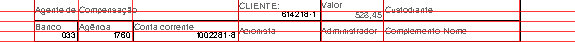

In [111]:
    coluna_banco = page.crop((20, 244, page.width, 286))
    banco_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_horizontal_lines": [255, 260, 277, 285],
        "explicit_vertical_lines": [54, 98, 152, 258, 341, 403, 540]
    }
    table_banco = coluna_banco.extract_table(banco_settings)

    obj_banco = {
        "Agente_de_compensação": table_banco[1][2],
        "Cliente": table_banco[1][3],
        "Valor": table_banco[1][4],
        "Custodiante": table_banco[1][5],
        "Banco": table_banco[4][0],
        "Agencia": table_banco[4][1],
        "Conta_Corrente": table_banco[4][2],
        "Acionista": table_banco[4][3],
        "Administrador": table_banco[4][4],
        "Complemento_Nome": table_banco[4][5]
    }
    print(obj_banco)
im = coluna_banco.to_image()
im.draw_hlines([255 , 265, 275, 285])
im.draw_vlines([54, 98, 152, 258, 341, 403, 539])

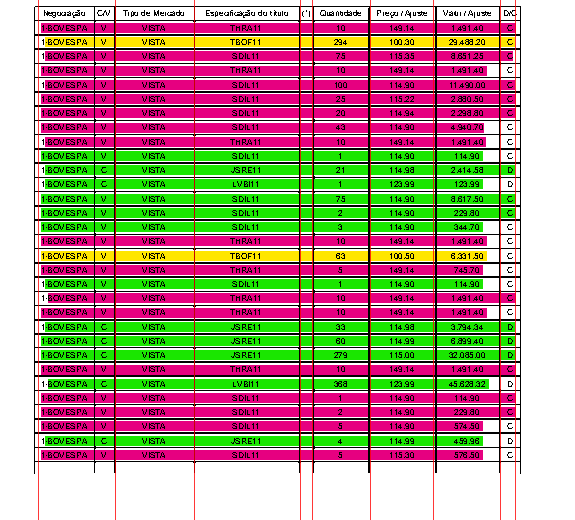

In [147]:
    coluna_negocios = page.crop((20, 310, page.width, 830))
    
im = coluna_negocios.to_image()
im.draw_vlines([58, 135, 214, 320, 332, 390, 453, 520, 535])